In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa


In [54]:

def spectrogram(waveform, size_frame, size_shift):
  spectrogram = []
  hamming_window = np.hamming(size_frame)

  for i in np.arange(0, len(waveform) - size_frame, size_shift):
    idx = int(i)
    x_frame = waveform[idx: idx + size_frame]

    # 窓掛けしたデータをFFT
    fft_spec = np.fft.rfft(x_frame * hamming_window)

    # 振幅スペクトルを対数化
    fft_log_abs_spec = np.log(np.abs(fft_spec))

    # 配列に保存
    spectrogram.append(fft_log_abs_spec)
  return spectrogram

def dyhu(y, h, u):
  diff = y - np.matmul(h, u)
  distance = 0
  for row in diff:
    for v in row:
      distance += v ** 2
  return distance

def updated_h(y, h, u):
  yu = np.matmul(y, u.T)
  uhu = np.matmul(np.matmul(h, u), u.T)
  for nk in range(len(h)):
    for ki in range(len(h[0])):
      h[nk][ki] = h[nk][ki] * (yu[nk][ki] / uhu[nk][ki])
  return h
      
def updated_u(y, h, u):
  yh = np.matmul(h.T, y)
  hhu = np.matmul(h.T, np.matmul(h, u))
  for ki in range(len(u)):
    for nk in range(len(u[0])):
      u[ki][nk] = u[ki][nk] * (yh[ki][nk] / hhu[ki][nk])
  return u

def learn(y, init_h, init_u):
  h = init_h
  u = init_u
  diffs = []
  for i in range(100):
    h = updated_h(y, h, u)
    u = updated_u(y, h, u)
    diffs.append(dyhu(y, h, u))
  plt.show(diffs)
  return h, u

SR = 16000
SIZE_FRAME = 2048
SHIFT_SIZE = 16000 / 100  # 10 msec
# https://www.youtube.com/watch?v=Ci_zad39Uhw
x, _ = librosa.load('audio/shs-test-man.wav', sr=SR)

Y = spectrogram(x, SIZE_FRAME, SHIFT_SIZE)
Y = np.exp(Y)
Y = np.array(Y).T
K = 5
H = np.random.rand(len(Y), K)
U = np.random.rand(K, len(Y[0]))
learn(Y, H, U)

(array([[0.0177319 , 0.02875637, 0.01389449, 0.01455498, 0.04231667],
        [0.01837071, 0.03546743, 0.03759243, 0.01452025, 0.02374563],
        [0.0480963 , 0.08532207, 0.03198966, 0.01629108, 0.02003034],
        ...,
        [0.00085176, 0.00230117, 0.00194784, 0.00115594, 0.00119952],
        [0.0008518 , 0.00230113, 0.00194787, 0.00115589, 0.00119953],
        [0.00085175, 0.00230105, 0.00194786, 0.00115597, 0.00119949]]),
 array([[9.17534763e-05, 6.88002539e-04, 1.85280479e-03, ...,
         1.77022772e-04, 2.04166756e-04, 2.18738012e-04],
        [2.97411006e-01, 3.32588994e-01, 3.57752324e-01, ...,
         5.04837137e-05, 3.69669464e-05, 3.12365514e-05],
        [6.86150842e-01, 7.15584762e-01, 6.87362727e-01, ...,
         4.99381534e-07, 5.82470016e-07, 3.90244957e-06],
        [2.93565207e-02, 5.63075463e-03, 3.07942121e-04, ...,
         4.42780726e-04, 4.61060592e-04, 4.48494022e-04],
        [3.15015616e-01, 3.88405240e-01, 4.68764408e-01, ...,
         8.29147796e-05

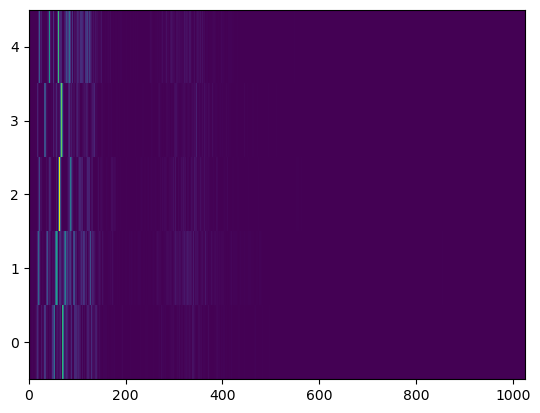

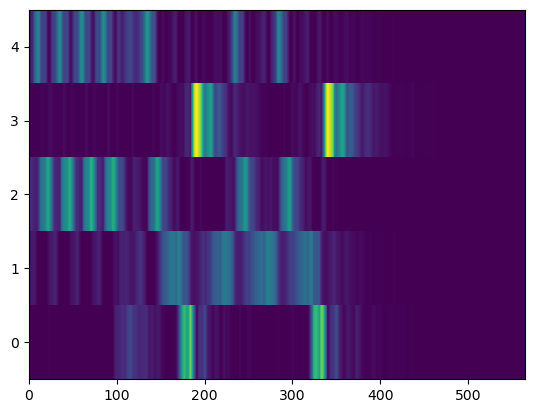

In [55]:

fig = plt.figure()
plt.imshow(H.T, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
fig.savefig(f'plot/nmf/h_{K}.png')

fig = plt.figure()
plt.imshow(U, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
fig.savefig(f'plot/nmf/u_{K}.png')

/Users/ansai/miniconda3/envs/exp4-audio/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


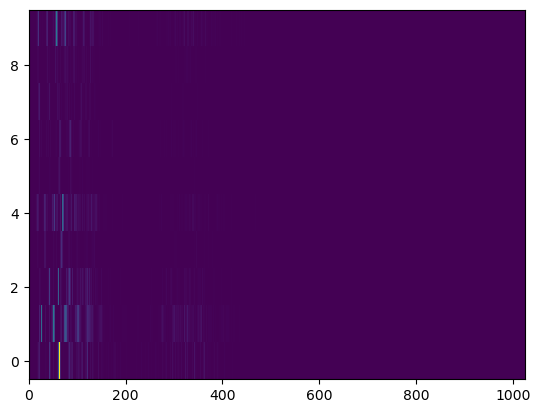

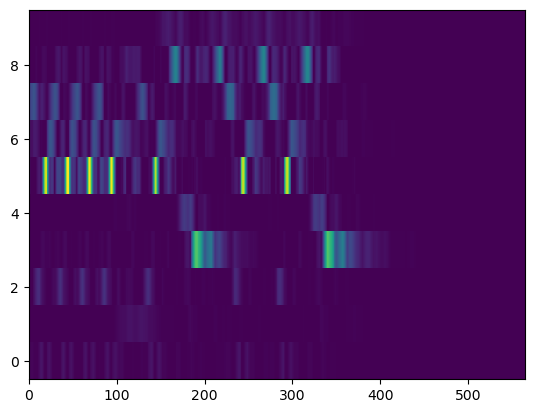

In [46]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(Y)
H = model.components_
plt.imshow(W.T, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
plt.imshow(H, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
